# **CHURN RISK PREDICTION**

### IMPORT LIBRARIES

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### IMPORT TRAINING DATA

In [116]:
df = pd.read_csv("dataset/train.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [117]:
df.shape

(36992, 25)

In [118]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [119]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [121]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

#### HANDLING NULL VALUES

In [122]:
# filling categorical missing column
df['region_category']= df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types']= df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])

In [123]:
# handle numerical missing column
df['points_in_wallet']= df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [124]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [125]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [127]:
# highly correlated
df[['complaint_status', 'past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [128]:
df.drop('complaint_status', axis=1, inplace=True)

In [129]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score'],
      dtype='object')

### HANDLE NUMERICAL COLUMNS

In [130]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]

In [131]:
df1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


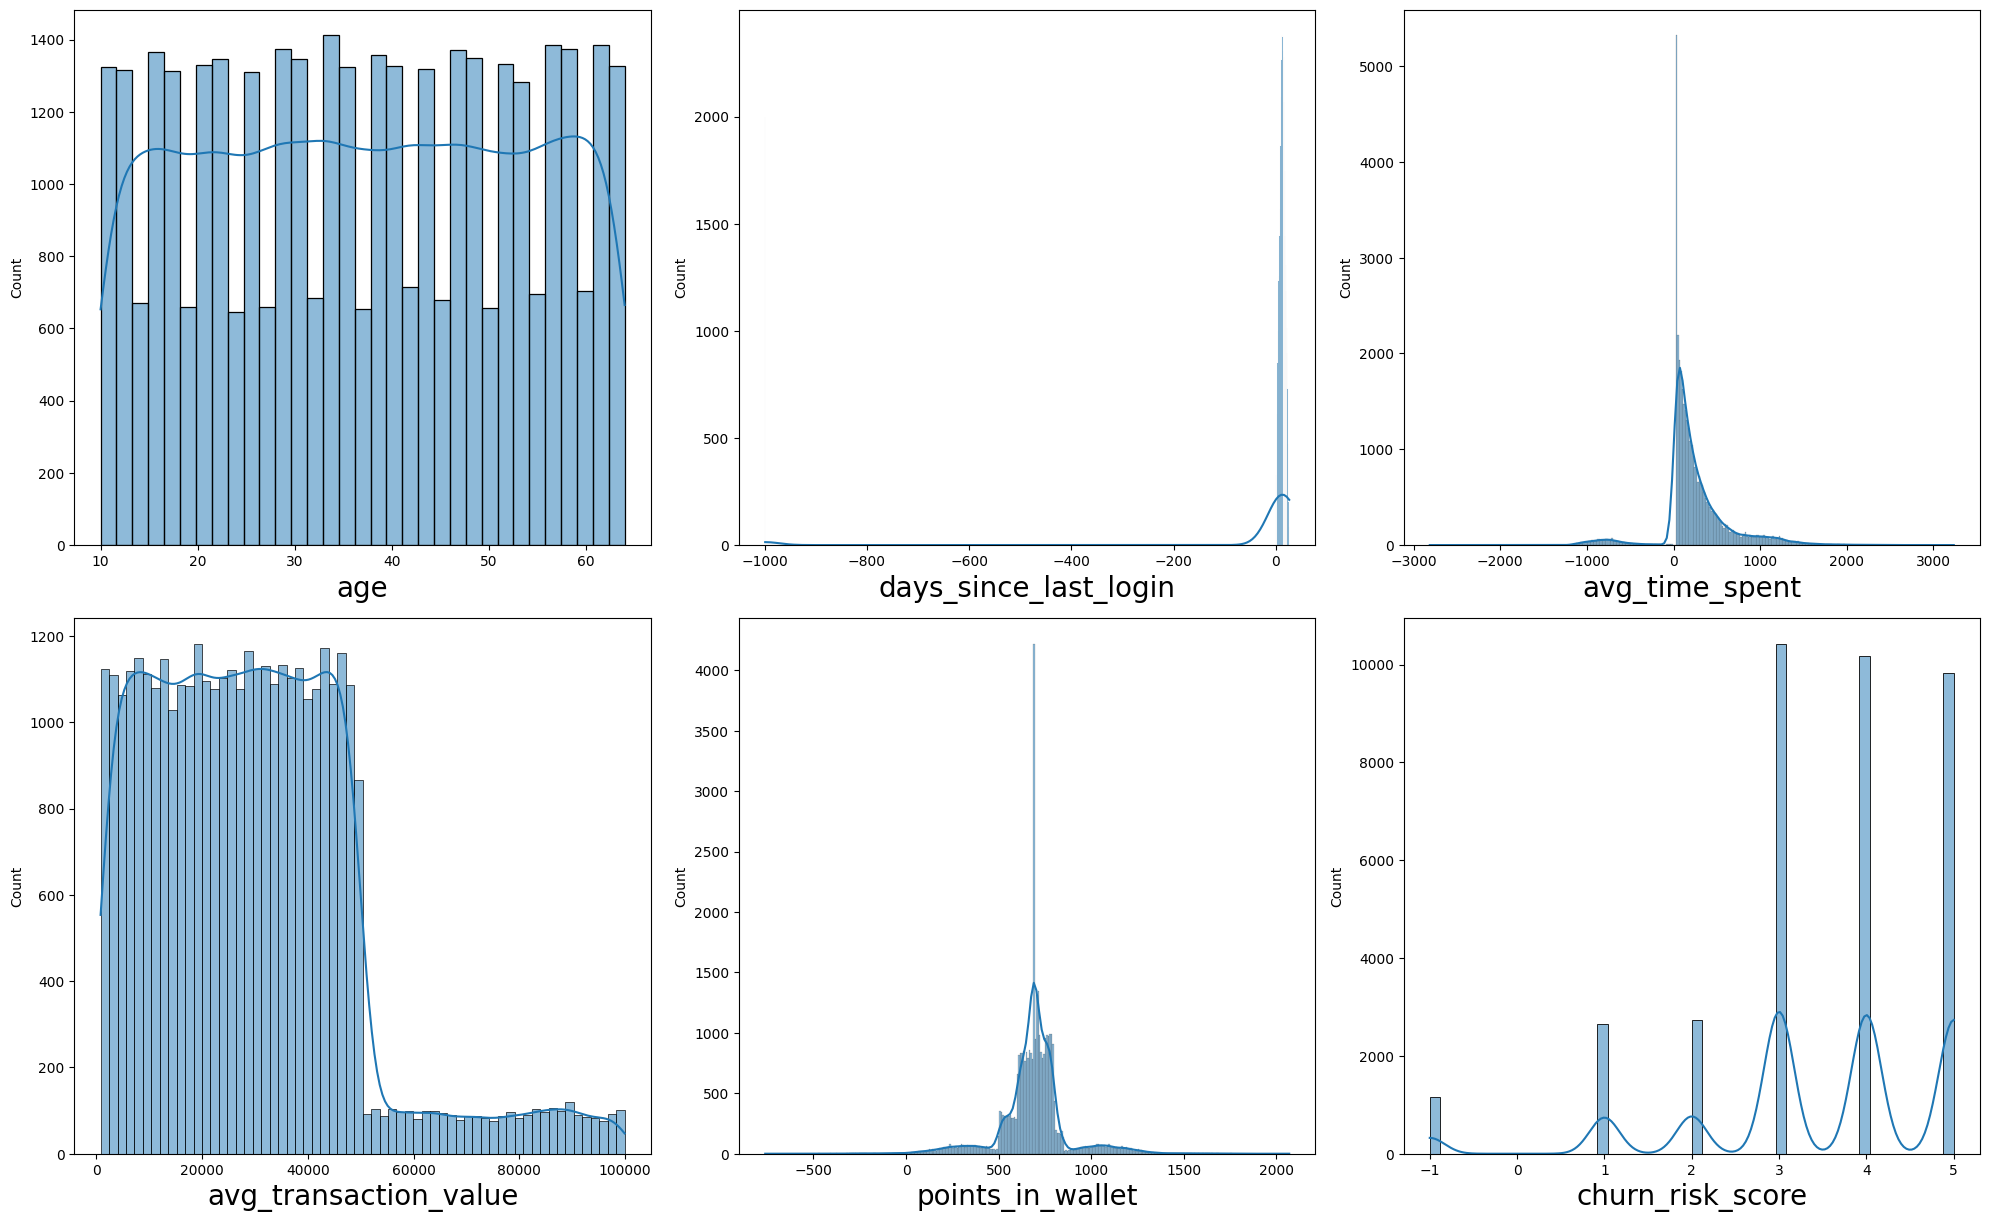

In [132]:
# lets see how data is distributed for every numeric column
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(df1[column], kde=True)
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

# Save the plot to the plots folder
plt.savefig('plots/numeric_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


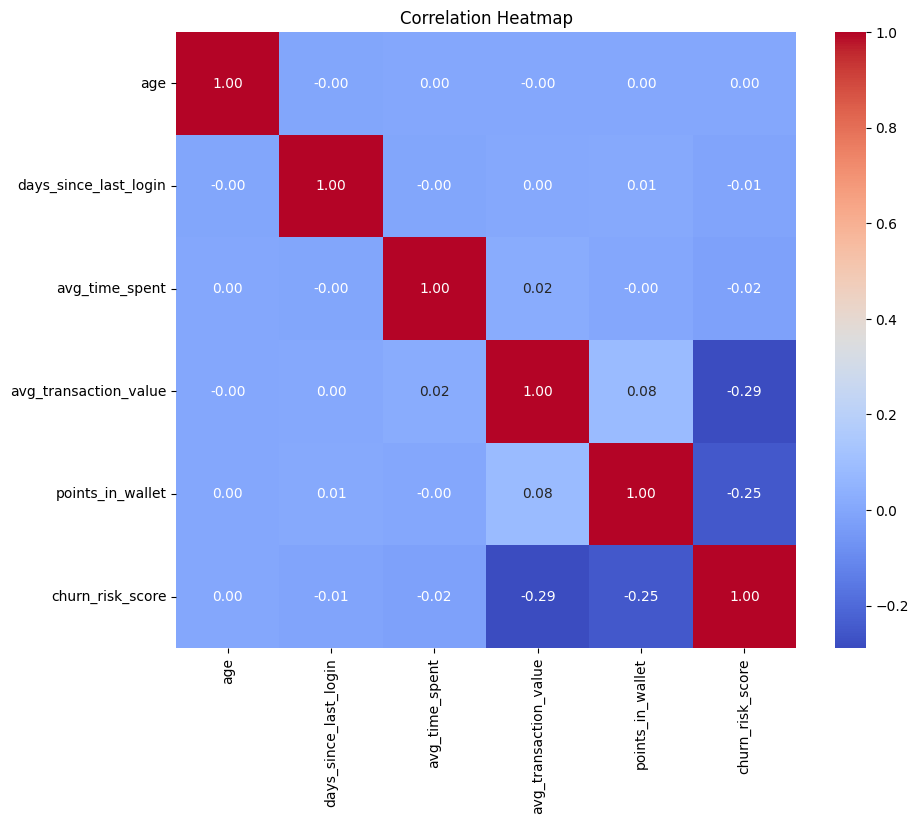

In [133]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

# Save the plot to the plots folder
plt.savefig('plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

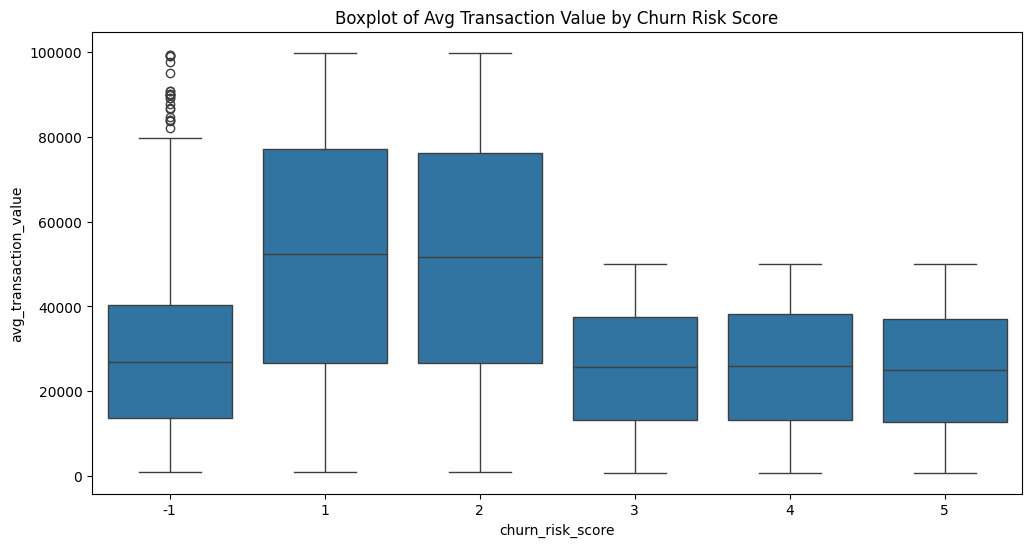

In [134]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data=df1)
plt.title('Boxplot of Avg Transaction Value by Churn Risk Score')
plt.show()

In [135]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['avg_transaction_value'].quantile(0.25)
Q3 = df1['avg_transaction_value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df1[(df1['avg_transaction_value'] >= lower_bound) & (df1['avg_transaction_value'] <= upper_bound)]

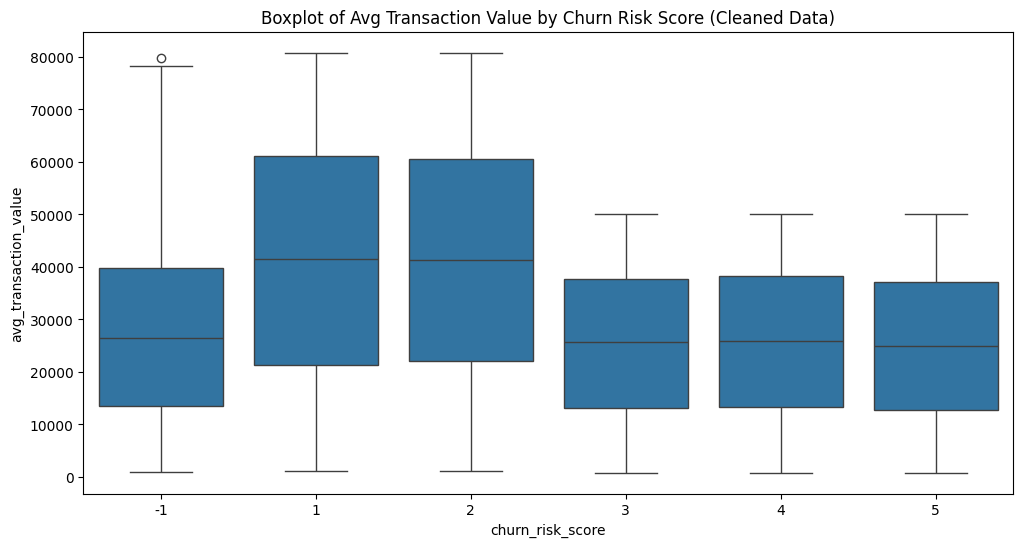

In [136]:
# Plot the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data=df_cleaned)
plt.title('Boxplot of Avg Transaction Value by Churn Risk Score (Cleaned Data)')

# Save the plot to the plots folder
plt.savefig('plots/cleaned_transaction_value_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

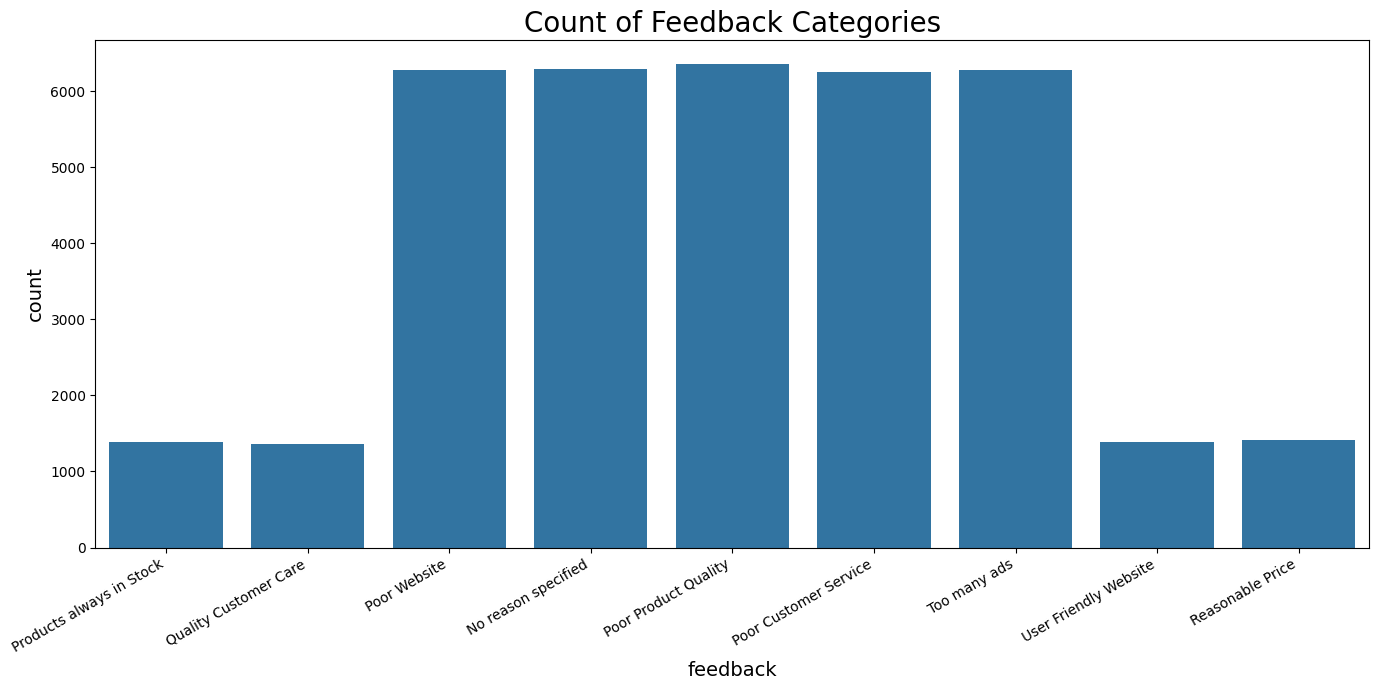

In [137]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='feedback')
plt.title('Count of Feedback Categories', fontsize=20)
plt.xlabel('feedback', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('plots/feedback_countplot.png', dpi=150)
plt.show()

<Figure size 1500x1000 with 0 Axes>

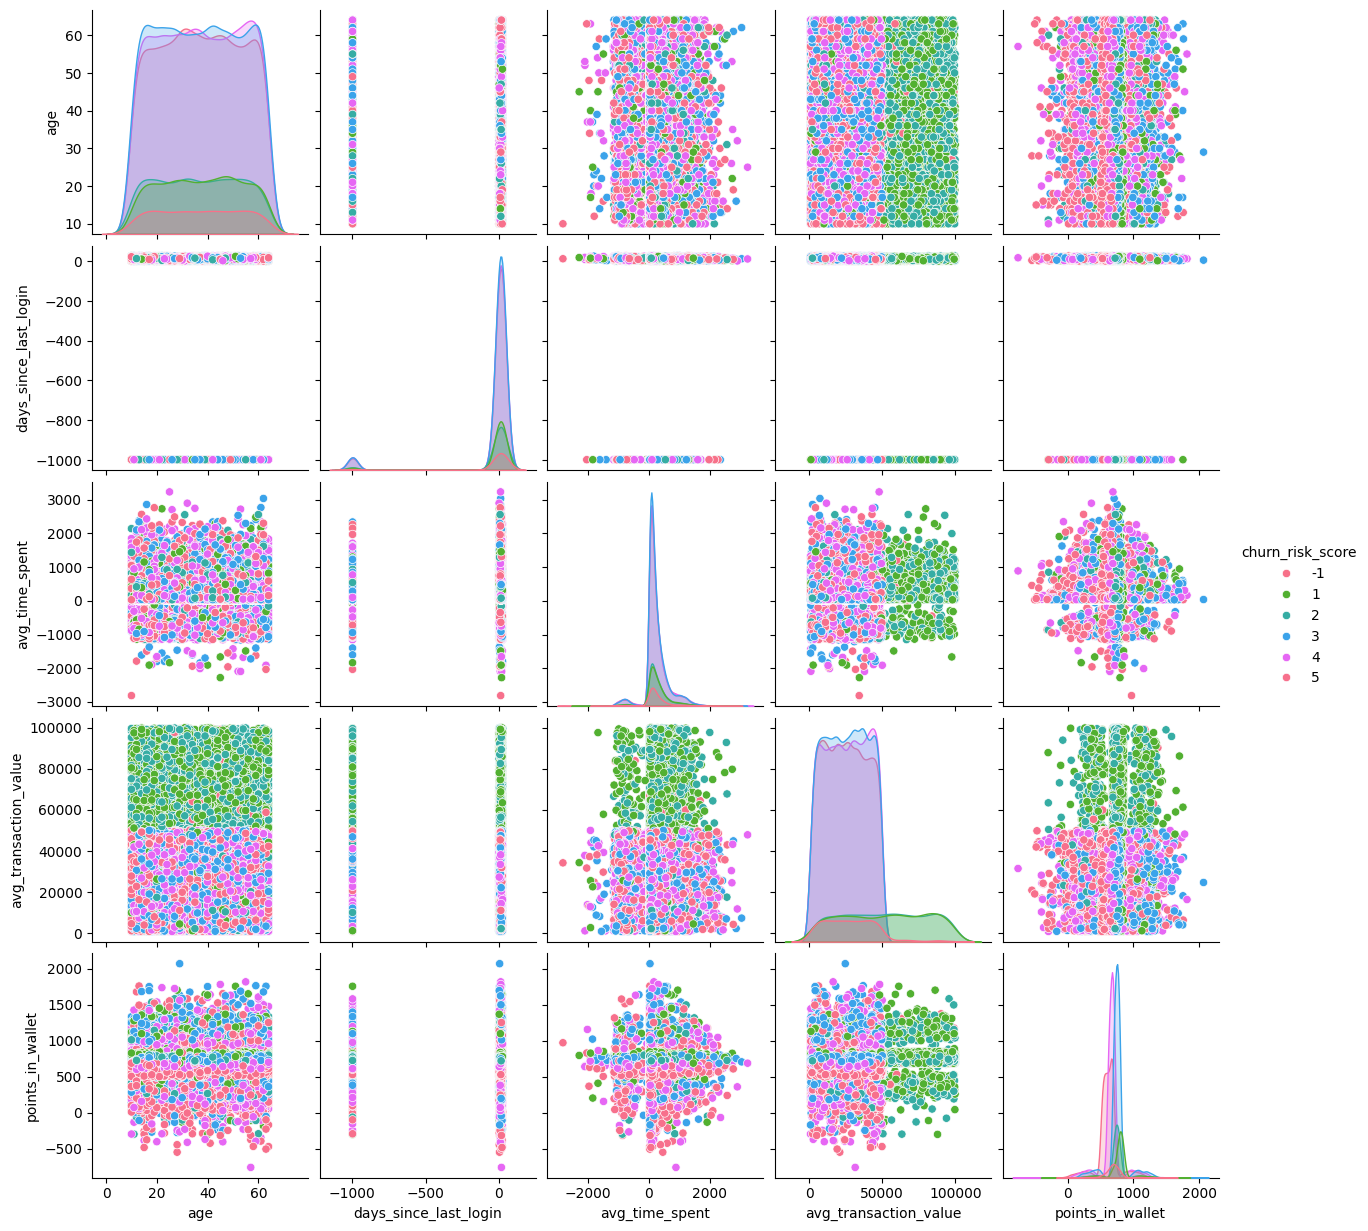

In [138]:
# Pairplot of the Numerical Columns
plt.figure(figsize=(15, 10))
sns.pairplot(df1, hue='churn_risk_score', palette='husl')
plt.savefig('plots/numerical_features_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [139]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Poor Website,5


In [140]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [141]:
df['joining_day'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.day
df['joining_month'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.month
df['joining_year'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.year

In [142]:
df[['joining_day', 'joining_month', 'joining_year']].head()

,joining_day,joining_month,joining_year
0,17,8,2017
1,28,8,2017
2,11,11,2016
3,29,10,2016
4,12,9,2017


In [143]:
df.drop(["joining_date"], axis=1, inplace=True)

In [144]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year'],
      dtype='object')

In [145]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [146]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [147]:
# Extract hour, minute, and second directly
df['last_visit_time_hour'] = pd.to_datetime(df['last_visit_time']).dt.hour
df['last_visit_time_minutes'] = pd.to_datetime(df['last_visit_time']).dt.minute
df['last_visit_time_seconds'] = pd.to_datetime(df['last_visit_time']).dt.second


C:\Users\TEST\AppData\Local\Temp\ipykernel_33376\3472546530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visit_time_hour'] = pd.to_datetime(df['last_visit_time']).dt.hour
C:\Users\TEST\AppData\Local\Temp\ipykernel_33376\3472546530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visit_time_minutes'] = pd.to_datetime(df['last_visit_time']).dt.minute
C:\Users\TEST\AppData\Local\Temp\ipykernel_33376\3472546530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visit_time_seconds'] = pd.to_datetime(df['last_visit_time']).dt.second


In [148]:
df[['last_visit_time_hour', 'last_visit_time_minutes', 'last_visit_time_seconds']].head()

,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,16,8,2
1,12,38,13
2,22,53,21
3,15,57,50
4,15,46,44


In [149]:
# Drop the original 'last_visit_time' column
df.drop('last_visit_time', axis=1, inplace=True)

In [150]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [151]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds'],
      dtype='object')

### HANDLE CATEGORICAL COLUMNS

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [153]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [154]:
gender = pd.get_dummies(df[['gender']], drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False


In [155]:
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

In [156]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,False,True
1,False,False
2,True,False
3,False,False
4,False,False


In [157]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [158]:
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [159]:
df.joined_through_referral.value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [160]:
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,True,False
1,False,False
2,False,True
3,False,True
4,True,False


In [161]:
df.preferred_offer_types.value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [162]:
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,True,False
1,True,False
2,True,False
3,True,False
4,False,False


In [163]:
df.medium_of_operation.value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [164]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,False,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,False,True


In [165]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [166]:
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [167]:
df.used_special_discount.value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [168]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,True
1,True
2,False
3,False
4,False


In [169]:
df.offer_application_preference.value_counts()

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64

In [170]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,True
1,False
2,True
3,True
4,True


In [171]:
df.past_complaint.value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [172]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,False
1,True
2,True
3,True
4,True


In [173]:
df.feedback.value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [174]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [175]:
# Concatenate dataframe -->

data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,True,False,False,False,False,True,False,False,False,False
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,False,True,False,False,False,False,True,False,False,False
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,True,True,False,False,True,False,False,False,False,False


In [176]:
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_refe

In [177]:
# drop unnecessary columns
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [178]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [179]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int32  
 7   joining_month                                36992 non-null  int32  
 8   joining_year                                 36992 non-null  int32  
 9   last_visit_time_hour                         36992 non-null  int32  
 10

In [180]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
  

In [181]:
data_train.shape

(36992, 41)

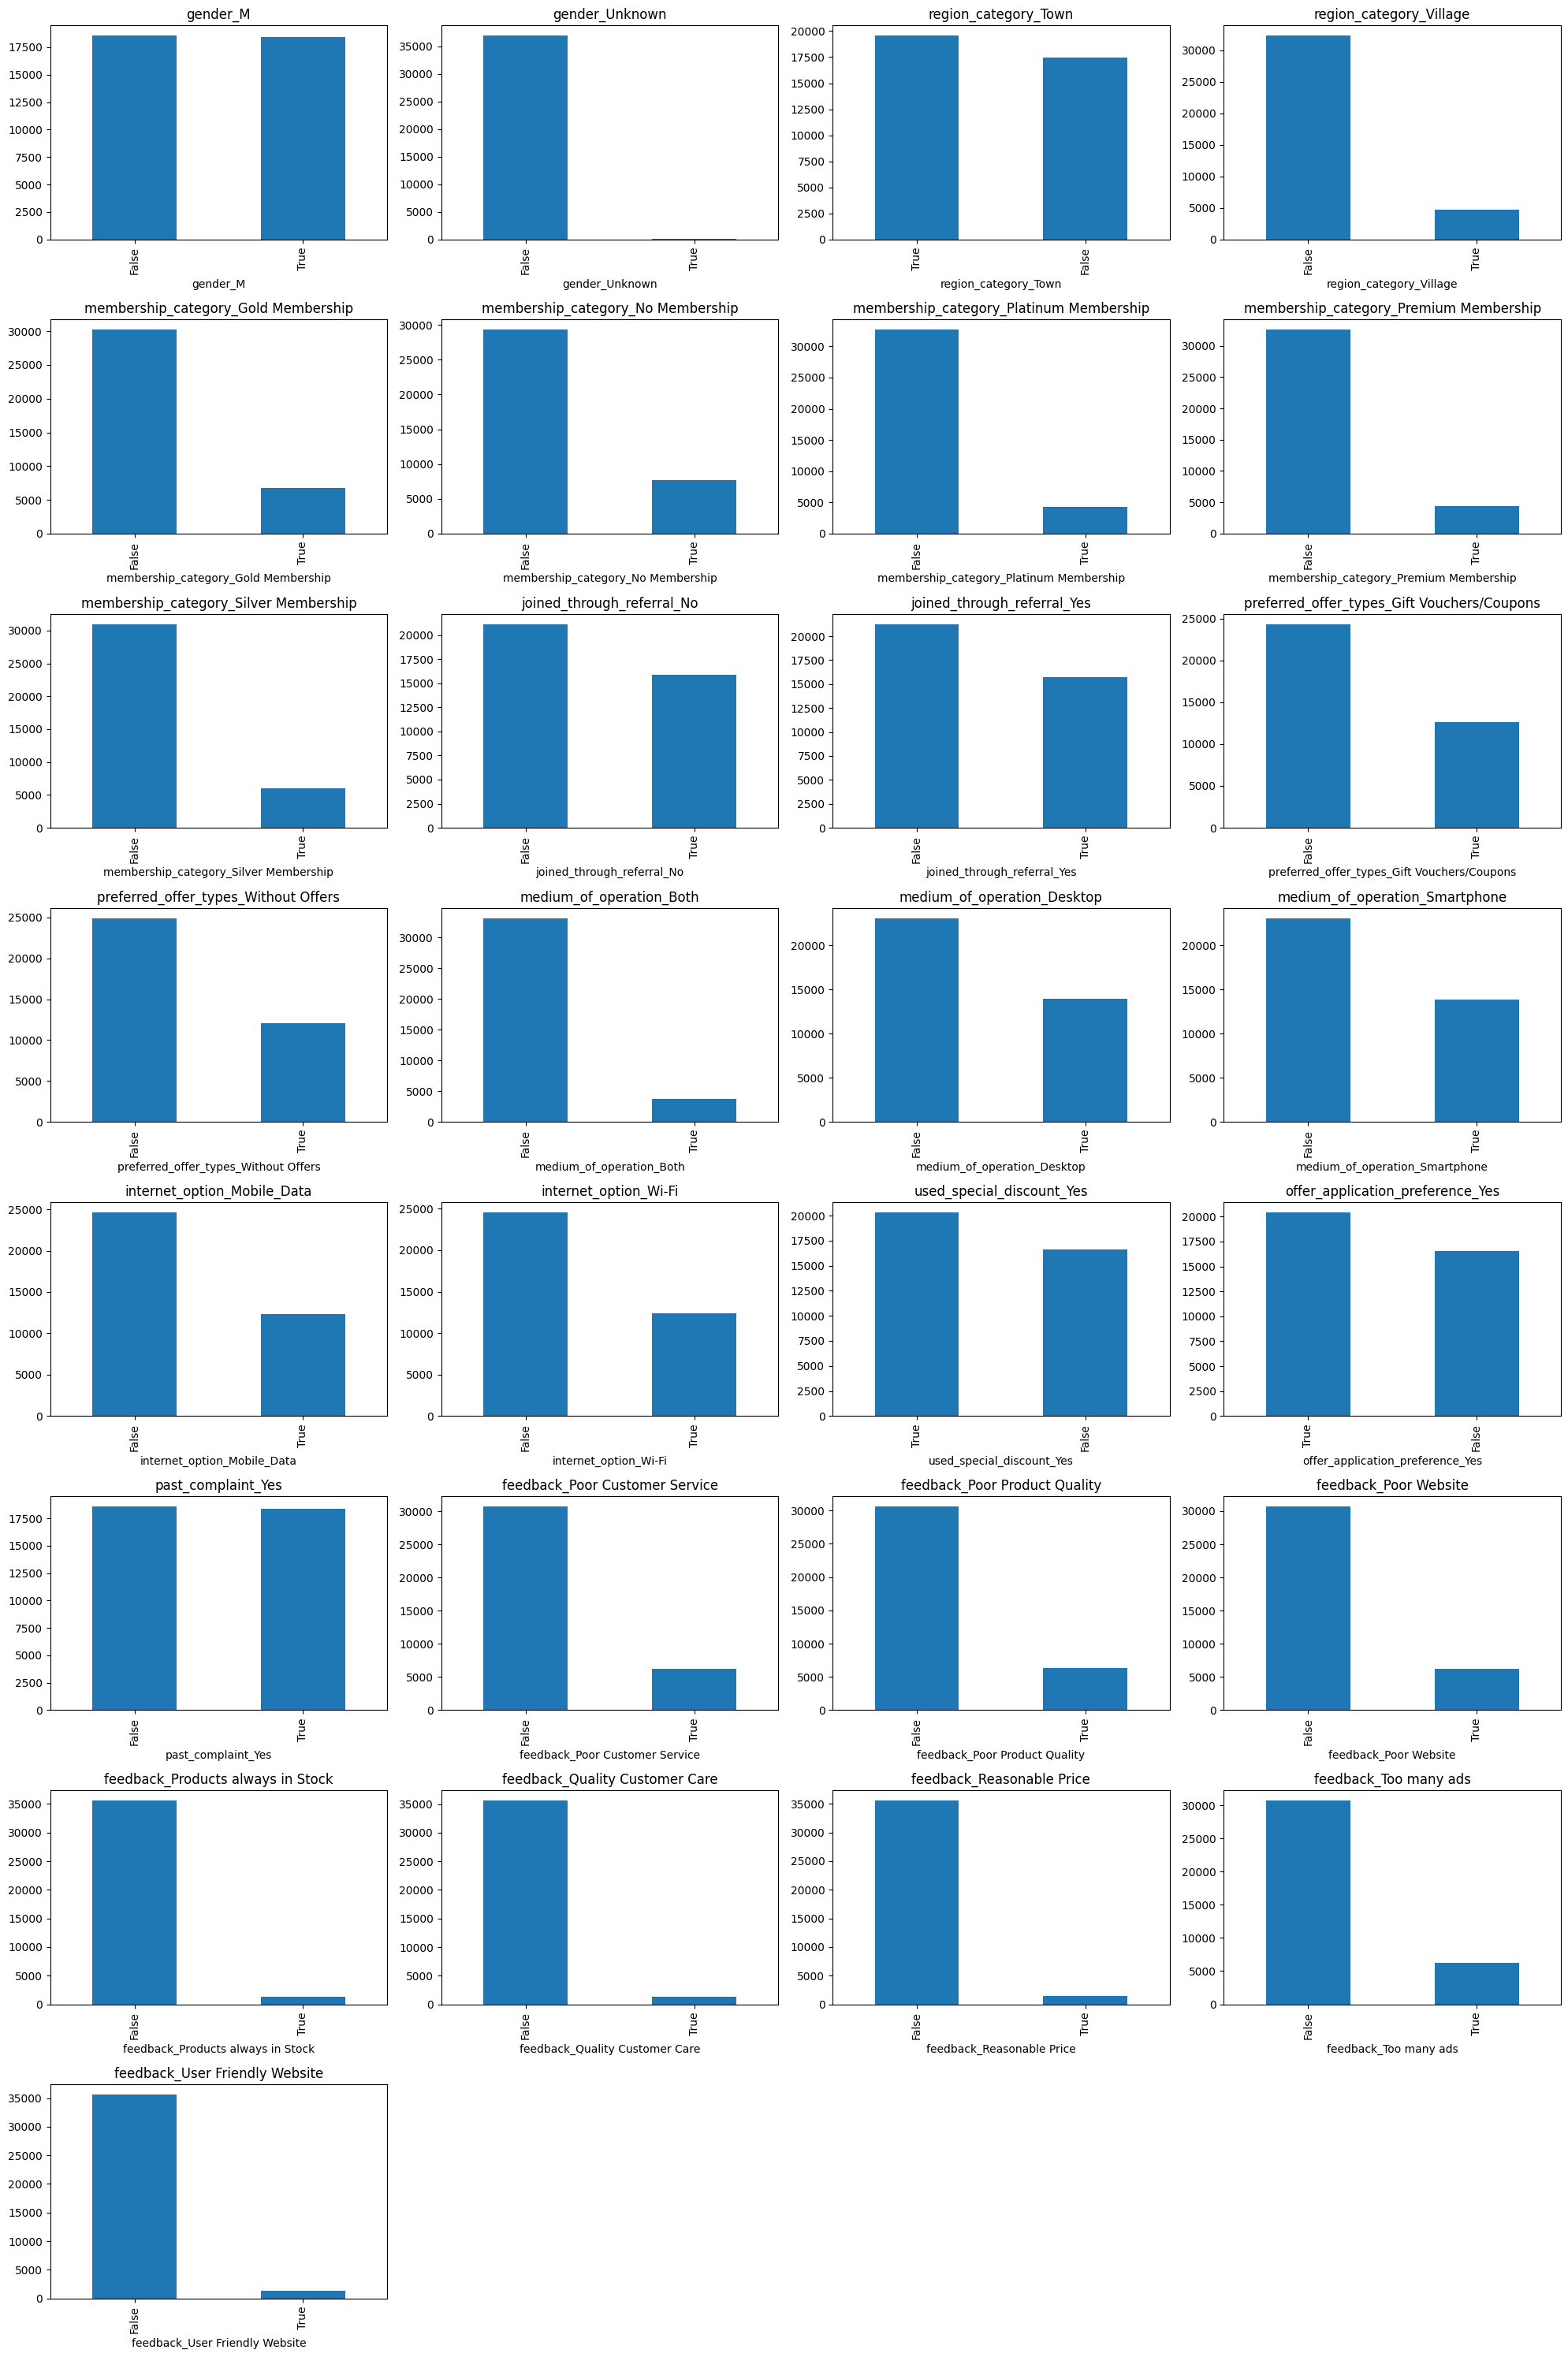

In [182]:
# Selecting some categorical columns to plot
categorical_columns = [
    'gender_M', 'gender_Unknown', 'region_category_Town', 'region_category_Village', 
    'membership_category_Gold Membership', 'membership_category_No Membership',
    'membership_category_Platinum Membership', 'membership_category_Premium Membership',
    'membership_category_Silver Membership', 'joined_through_referral_No', 
    'joined_through_referral_Yes', 'preferred_offer_types_Gift Vouchers/Coupons', 
    'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 
    'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 
    'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 
    'used_special_discount_Yes', 'offer_application_preference_Yes', 
    'past_complaint_Yes', 'feedback_Poor Customer Service', 'feedback_Poor Product Quality', 
    'feedback_Poor Website', 'feedback_Products always in Stock', 
    'feedback_Quality Customer Care', 'feedback_Reasonable Price', 
    'feedback_Too many ads', 'feedback_User Friendly Website'
]

# Creating subplots for bar charts
plt.figure(figsize=(20, 30))  # Adjust the figure size as needed
plotnumber = 1

for column in categorical_columns:
    ax = plt.subplot(8, 4, plotnumber)  # Change grid size to 8x4
    data_train[column].value_counts().plot(kind='bar', ax=ax)
    plt.title(column)
    plotnumber += 1

plt.tight_layout()
plt.savefig('plots/categorical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### IMPORT TEST DATASET

In [183]:
tf = pd.read_csv("dataset/test.csv")
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [184]:
# Fill missing values for categorical columns with mode
tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# Fill missing values for numerical columns with mean
tf['points_in_wallet'] = tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# Drop unnecessary column
tf.drop('complaint_status', axis=1, inplace=True)

# Convert 'joining_date' to day, month, and year
tf["joining_day"] = pd.to_datetime(tf.joining_date, format="%Y-%m-%d").dt.day
tf["joining_month"] = pd.to_datetime(tf.joining_date, format="%Y-%m-%d").dt.month
tf["joining_year"] = pd.to_datetime(tf.joining_date, format="%Y-%m-%d").dt.year

# Drop 'joining_date' column after extracting day, month, and year
tf.drop(["joining_date"], axis=1, inplace=True)

# Extract hour, minutes, and seconds from 'last_visit_time'
tf[['last_visit_time_hour', 'last_visit_time_minutes', 'last_visit_time_seconds']] = tf['last_visit_time'].str.split(':', expand=True).astype(int)

# Drop 'last_visit_time' column after extraction
tf.drop(["last_visit_time"], axis=1, inplace=True)

# Convert categorical columns to dummy/one-hot encoded variables
gender = pd.get_dummies(tf['gender'], drop_first=True)
region = pd.get_dummies(tf['region_category'], drop_first=True)
membership = pd.get_dummies(tf['membership_category'], drop_first=True)
referral = pd.get_dummies(tf['joined_through_referral'], drop_first=True)
offer = pd.get_dummies(tf['preferred_offer_types'], drop_first=True)
medium = pd.get_dummies(tf['medium_of_operation'], drop_first=True)
internet = pd.get_dummies(tf['internet_option'], drop_first=True)
discount = pd.get_dummies(tf['used_special_discount'], drop_first=True)
application = pd.get_dummies(tf['offer_application_preference'], drop_first=True)
complaint = pd.get_dummies(tf['past_complaint'], drop_first=True)
feedback = pd.get_dummies(tf['feedback'], drop_first=True)

# Combine all one-hot encoded columns with the original DataFrame
data_test = pd.concat([tf, gender, region, membership, referral, offer, medium, internet, discount, application, complaint, feedback], axis=1)

# Drop original categorical columns and other unnecessary columns
data_test.drop([
    "customer_id", "Name", "gender", "security_no", "region_category", 
    "membership_category", "joined_through_referral", "referral_id", 
    "preferred_offer_types", "medium_of_operation", "internet_option", 
    "used_special_discount", "offer_application_preference", 
    "past_complaint", "feedback", "avg_frequency_login_days"
], axis=1, inplace=True)

# Display the first few rows of the preprocessed data
data_test.head()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,Yes,Yes,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,False,False,False,True,False,False,False,False,False,False
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,False,False,False,False,True,False,False,False,False,False
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,False,True,False,False,False,False,False,False,False,False
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,False,True,False,False,False,False,False,False,True,False
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,True,True,False,False,True,False,False,False,False,False


In [185]:
data_test.shape

(19919, 40)

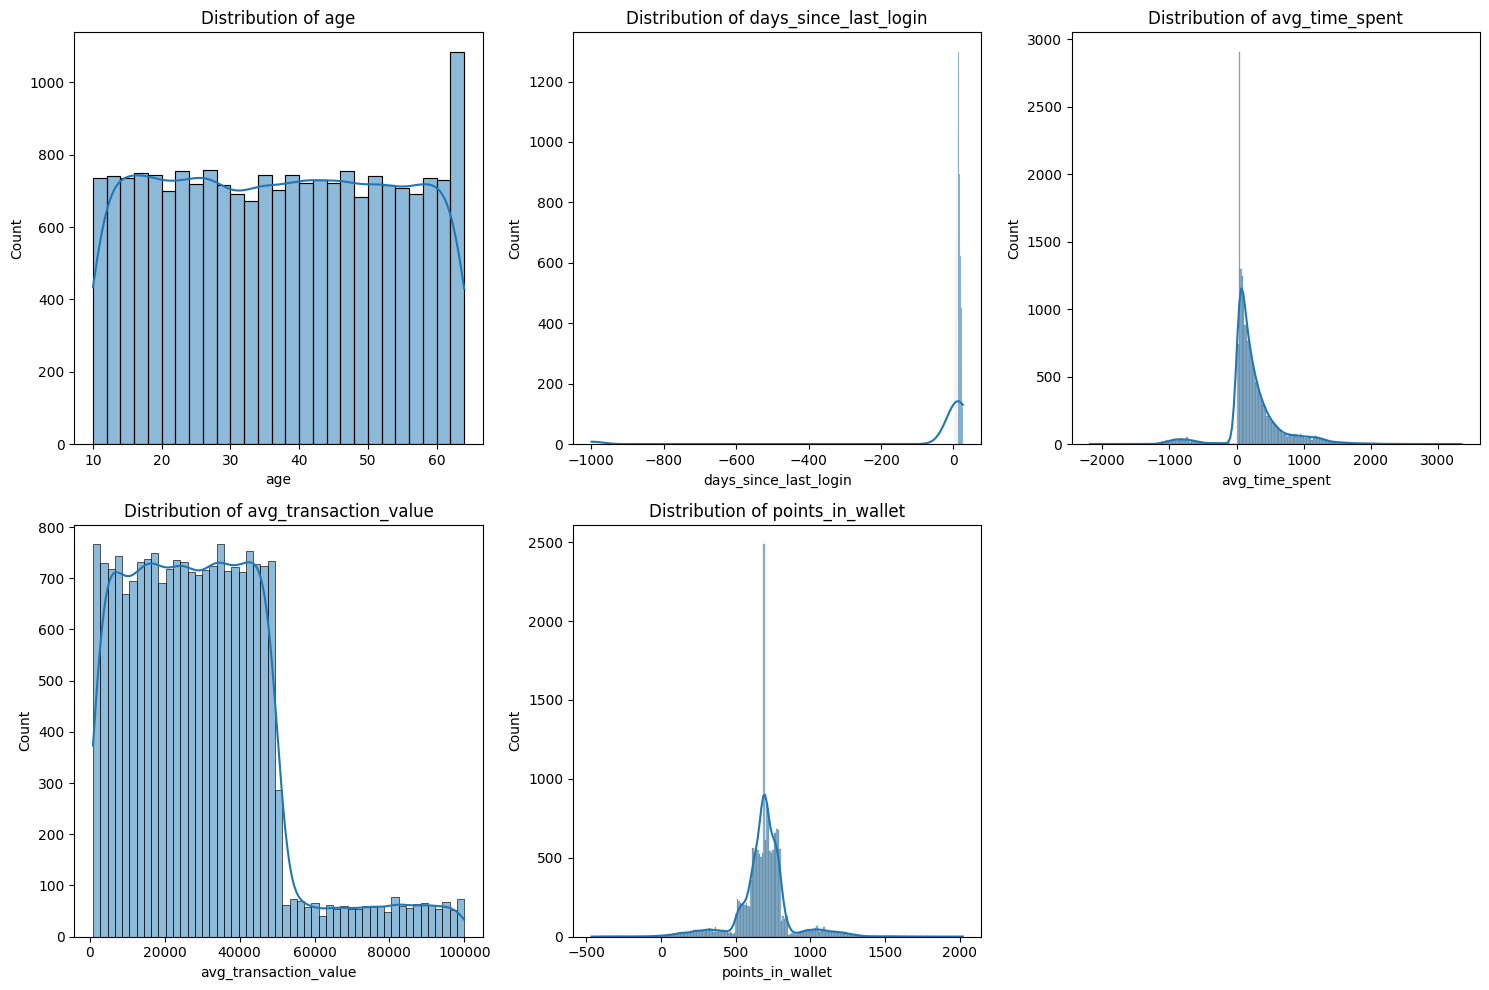

In [186]:
numeric_features = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data_test[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()

# Save the plot
plt.savefig('plots/numeric_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Selection

In [187]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [188]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
  

#### FEATURES COLUMNS

In [189]:
x = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [190]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,True,True,False,False,True,False,False,False,False,False


#### TARGET COLUMN

In [191]:
y= data_train[['churn_risk_score']]

In [192]:
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [193]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [194]:
print(selection.feature_importances_)

[0.02428947 0.02074382 0.02484264 0.07517332 0.06364492 0.02440716
 0.02278335 0.01437691 0.02408918 0.02396135 0.02451152 0.00984478
 0.00033063 0.01112782 0.0073172  0.03119423 0.13451197 0.03833195
 0.03065757 0.05648602 0.00842217 0.00897902 0.01031099 0.0096843
 0.00614378 0.00832723 0.0082633  0.00878555 0.00977883 0.00794554
 0.00695617 0.01168976 0.00822675 0.00824061 0.00679331 0.05126228
 0.05442251 0.04764015 0.00752959 0.04797232]


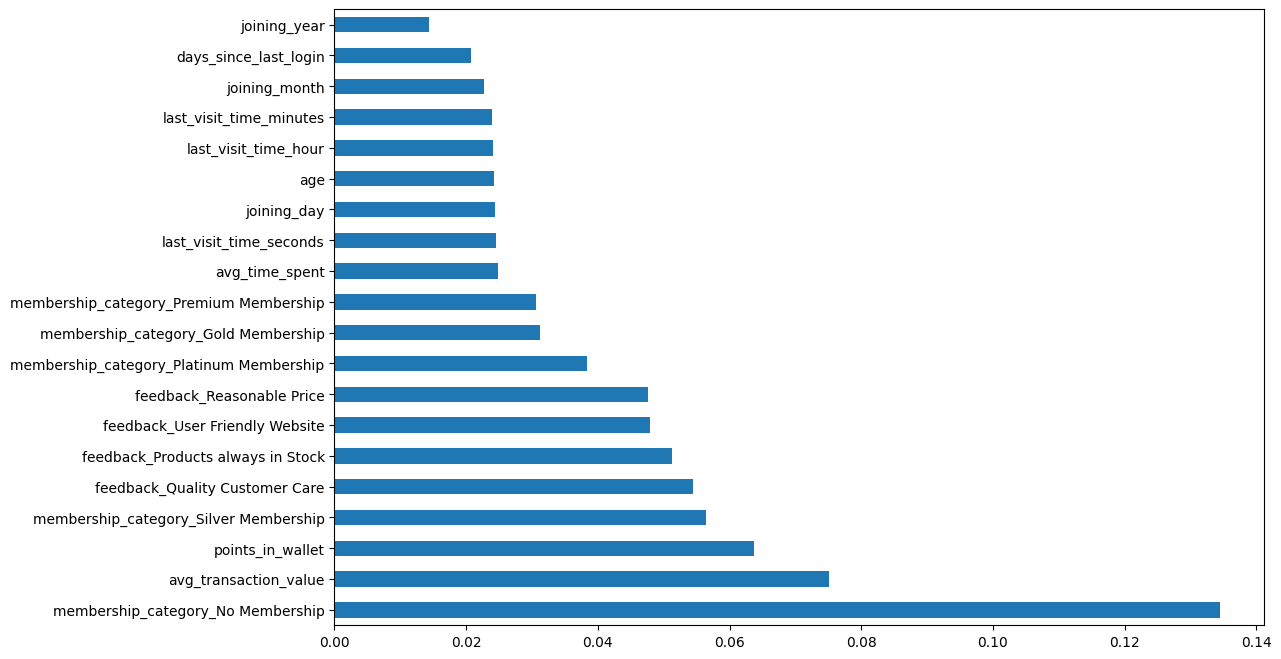

In [195]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.savefig('plots/feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

## MODEL TRAINING

In [196]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [197]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,600.540000,26,3,2015,7,26,...,True,True,False,False,False,False,False,False,True,False
28260,42,16,1427.643434,48511.87,700.920000,2,10,2015,11,43,...,True,True,True,False,False,False,False,False,False,False
31412,10,-999,-779.419727,46612.57,744.650000,8,4,2016,2,41,...,True,True,False,False,False,False,False,False,True,False
6700,12,9,245.010000,95291.95,686.882199,23,2,2016,15,29,...,False,True,False,False,False,False,False,True,False,False
31958,28,14,308.770000,45564.89,716.280000,2,1,2017,10,59,...,False,True,False,False,True,False,False,False,False,False


In [198]:
x_train.shape

(29593, 40)

In [199]:
x_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
9550,24,17,101.50,32593.20,801.180000,22,4,2015,11,10,...,False,False,False,False,False,True,False,False,False,False
7112,53,12,324.61,39155.49,686.882199,19,1,2016,18,20,...,True,False,False,False,False,False,False,False,False,False
9545,53,20,47.71,35434.17,675.170000,7,2,2016,20,46,...,False,False,False,True,False,False,False,False,False,False
10261,61,19,451.66,30621.93,755.930000,24,10,2017,20,30,...,True,True,False,True,False,False,False,False,False,False
9876,46,12,266.68,50462.15,806.670000,11,6,2016,2,20,...,True,True,False,False,False,True,False,False,False,False


In [200]:
x_test.shape

(7399, 40)

In [201]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data
x_test_scaled = scaler.transform(x_test)

### DECISION TREE MODEL

In [202]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [203]:
# checking accuracy of test dataset
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  71.14474929044465


### RANDOM FOREST MODEL

In [204]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [205]:
# checking training accuracy
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  100.0


In [206]:
# checking accuracy of test dataset
print("testing accuracy is : ", rf.score(x_test, y_test)*100)

testing accuracy is :  74.9966211650223


In [207]:
import pickle
# Save the model to a file (e.g., 'random_forest_model.pkl')
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

In [208]:
# Load the model from the file
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [209]:
# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)
print(predictions)

[1 4 5 ... 3 3 4]


### ANN MODEL USING PYTORCH

In [210]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Convert non-numeric data to numeric (if necessary)
x = np.array(x, dtype=np.float32)

# Handle missing values if present
x = np.nan_to_num(x, nan=0.0)

# Convert y to a numpy array and ensure it is a column vector
y = np.array(y, dtype=np.float32)
y = np.where(y > 0.5, 1, 0)  # Ensure y is binary
y = y.reshape(-1, 1)  # Ensure y is a column vector

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create DataLoader for training and validation
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [211]:
import torch.nn as nn

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

input_dim = X_tensor.shape[1]  # Number of features in your dataset
model = ANNModel(input_dim)

In [212]:
import torch.optim as optim

# Initialize the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            val_loss += criterion(outputs, batch_y).item()
            predictions = (outputs > 0.5).float()  # Binarize the output
            correct += (predictions == batch_y).sum().item()
            total += batch_y.size(0)
        val_accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch [1/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [2/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [3/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [4/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [5/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [6/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [7/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [8/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [9/10], Val Loss: 3.1789, Val Accuracy: 0.9681
Epoch [10/10], Val Loss: 3.1789, Val Accuracy: 0.9681
